In [1]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torch import randperm
from torch._utils import _accumulate
import torchvision
from torchvision import datasets, transforms, models
import xml.etree.ElementTree as ET
import os
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
import os
import cv2
import torch
import random
import numbers
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torch import randperm
from torch._utils import _accumulate
import torchvision
from torchvision import datasets, transforms, models
import torchvision.transforms.functional as F
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn
import time
from skimage import io, transform
import sklearn.metrics as skm
from scipy.spatial import distance
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models

# Generating the heatmap target images of the Detection dataset

In [2]:
def find_bound_box(values,label,factor_x,factor_y):
   xmin = float(values.find('xmin').text)*factor_x/4
   ymin = float(values.find('ymin').text)*factor_y/4
   xmax = float(values.find('xmax').text)*factor_x/4
   ymax = float(values.find('ymax').text)*factor_y/4
    
   if label == 2 or label == 1:
    return np.array([int(ymin + (ymax-ymin)/2), int(xmin + (xmax-xmin)/2)])
   else:
    return np.array([ymin + (ymax-ymin)/2, xmin + (xmax-xmin)/2])

In [7]:
def generate_heatMap(label,height, width,img_heatmap,object_position):
    #print(object_position)
    label_radius = [20,40,20]

    radius = label_radius[label]

    # Getting Gaussian blobs
    idxs = np.meshgrid(np.arange(0, height), np.arange(0, width))
    idxs = np.array(idxs).T.reshape(-1, 2)
    dist = multivariate_normal.pdf(idxs, object_position, [radius, radius])

    # Normalize this blobs between 0 and 1
    dist = (dist - dist.min()) / (dist.max() - dist.min())

    img_heatmap[:,:,label] += 255*dist.reshape(height, width)
     
    return img_heatmap

In [8]:
def create_heatMap_images(root_dir):
  labels = {"ball":0 , "robot": 1, "goalpost": 2}

  k = 0
  for file in os.listdir(root_dir):
    
    # Finding the images extension
    if file.endswith(".jpg"):
      extension = ".jpg"
    elif file.endswith(".jpeg"):
      extension = ".jpeg"
    elif file.endswith(".png") and not file.endswith("_heatmap.png"):
      extension = ".png"
    else:
      continue

    filepath = os.path.join(root_dir,file)
    xml_file = filepath.replace(extension,'.xml')
    # Resulted heatmap image will have same name as input image, with suffix _heatmap
    filename = filepath.replace(extension,'_heatmap.png')

    if os.path.isfile(xml_file):
        
      # To consider the fiels with different sizes than the default size, also their coordinates should be rescaled
      if (file.startswith('b')):
        factor_x = 0.8
        factor_y = 0.8
      # To consider the fiels with different sizes than the default size, also their coordinates should be rescaled
      elif (file.startswith('out')):
        factor_x = 1.18518518519
        factor_y = 1.33333333
        
      else:
        factor_x = 1
        factor_y = 1
        
      image = cv2.imread(filepath,cv2.COLOR_BGR2RGB)
      # The output image is 1/4 the input image!
      new_shape = (int(image.shape[0]/4),int(image.shape[1]/4),3)
      # The background of the heatmap image is black!
      img_heatmap = np.zeros(new_shape,dtype='float32')
      # parsing the xml file
      xml_data = ET.parse(xml_file).getroot()

      all_objects_list = xml_data.findall('object')
      
    # extracting the bound box coordinates and the label of the objects 
      for group in all_objects_list:
          bndvalues = group.find('bndbox')
          name = group.find('name').text
          label = labels[name]
          object_position = find_bound_box(bndvalues,label,factor_x,factor_y)
          # putting a gaussian blob in the location of the object, on the black image, to result in the heatmap target image
          img_heatmap = generate_heatMap(label,new_shape[0],new_shape[1],img_heatmap,object_position)
      img_heatmap = np.where(img_heatmap > 255, 255, img_heatmap)
      cv2.imwrite(filename, img_heatmap)
  
      k+=1
      
  print("done ", k)  

In [11]:
create_heatMap_images("/home/user/bhassan/baraa/dataset/data/blob/dataset")

done  5255


# Fixing the problem of the segmentation target images different distributions

In [55]:
def fix_segmentation_distribution(root_dir):
  k=0
  for afile in os.listdir(root_dir):#images_folder):
    file_path = os.path.join(root_dir,afile)
    img = cv2.imread(file_path,0)

    if file.endswith(".png"):
        if afile.startswith("opx"):
          print(afile)
          img[img==3] = 1
          img[img==1] = 128
          img[img==2] = 255

        else:
          img[img == 75] = 255
          img[img==113] = 128


        cv2.imwrite(file_path,img)
        
        k+=1

  print("done" ,k)

In [56]:
fix_segmentation_distribution("/home/user/bhassan/baraa/dataset/data/segmentation/dataset/target")

(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)
(120, 160)

In [20]:
def segmentation_target_resize(root_dir):
  k = 0
  for file in os.listdir(root_dir):
        
    filepath = os.path.join(root_dir,file)
    if file.endswith(".png"):
        img = Image.open(filepath)
        if (img.size != (160,120)):
          print(file)
          img = img.resize((160,120),Image.NEAREST)
          img.save(filepath)
          k+=1
  print("done ", k)   

In [21]:
segmentation_target_resize("/home/user/bhassan/baraa/dataset/data/segmentation/dataset/target")

opx_frame004545.png
opx_frame003730.png
opx_frame002405.png
opx_frame003250.png
opx_frame003990.png
opx_frame001370.png
2019-06-19-10-58-07.png
opx_frame002015.png
opx_frame005120.png
opx_frame003955.png
opx_frame002010.png
opx_frame002860.png
opx_frame005570.png
opx_frame001830.png
opx_frame004455.png
opx_frame002540.png
opx_frame000845.png
opx_frame003565.png
opx_frame002310.png
opx_frame001050.png
opx_frame000860.png
opx_frame003795.png
opx_frame004655.png
opx_frame002270.png
opx_frame000645.png
opx_frame005195.png
opx_frame005325.png
opx_frame001020.png
opx_frame004460.png
bneb_euro_ball_01_a_00151.png
opx_frame005520.png
opx_frame003130.png
opx_frame002845.png
opx_frame003585.png
opx_frame002145.png
2019-06-19-10-56-07.png
opx_frame001950.png
opx_frame003830.png
opx_frame000165.png
opx_frame000925.png
opx_frame004200.png
00213.png
opx_frame005340.png
opx_frame005190.png
opx_frame004850.png
2019-06-19-10-56-16.png
opx_frame004510.png
opx_frame002780.png
opx_frame004555.png
opx_fram

In [153]:
def show(root_dir):
  labels = {"ball":0 , "goalpost":1 , "robot":2}

  k = 0
  for file in ["opx_frame001035.jpg","output_iHOPOKatR2016TF_0025.png","output_iHOP__0113_copy.png","bs09_leipzig_robocup16_005.160.png","bnebg_euro_ball_game_1_l_00201.png"]:
    if file.endswith(".jpg"):
      extension = ".jpg"
    elif file.endswith(".jpeg"):
      extension = ".jpeg"
    elif file.endswith(".png") and not file.endswith("_heatmap.png"):
      extension = ".png"
    else:
      continue

    filepath = os.path.join(root_dir,file)
    xml_file = filepath.replace(extension,'.xml')
    filename = filepath.replace(extension,'_heatmap.png')
    if os.path.isfile(xml_file):
      if (file.startswith('b')):
        factor_x = 0.8
        factor_y = 0.8
      elif (file.startswith('out')):
        factor = 1.18518518519
        factor_x = 1.18518518519
        factor_y = 1.33333333
      else:
        factor_x = 1
        factor_y = 1
        
      xml_data = ET.parse(xml_file).getroot()


      all_objects_list = xml_data.findall('object')

      for group in all_objects_list:
          bndvalues = group.find('bndbox')
          name = group.find('name').text
          label = labels[name]
          land_marks = find_bound_box(bndvalues,label,factor_x,factor_y)
          print("name = ", name, " land_marks = ",land_marks)
            
    image = cv2.imread(filepath,cv2.COLOR_BGR2RGB)
    image2 = cv2.imread(filename,cv2.COLOR_BGR2RGB)
    print(image2.shape)
    plt.imshow(image)
    plt.show()
    plt.imshow(image2)
    plt.show()
      
  print("done ", k)

xmin =  297
ymin =  233
xmax =  364
ymax =  274
name =  robot  land_marks =  [68 82]
xmin =  304
ymin =  291
xmax =  358
ymax =  349
name =  ball  land_marks =  [87 82]
xmin =  230
ymin =  46
xmax =  238
ymax =  77
name =  goalpost  land_marks =  [19 58]
xmin =  391
ymin =  53
xmax =  397
ymax =  80
name =  goalpost  land_marks =  [20 98]
(120, 160, 3)


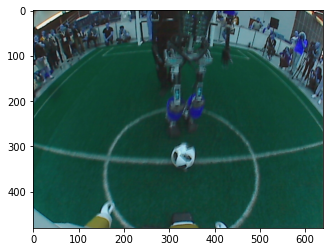

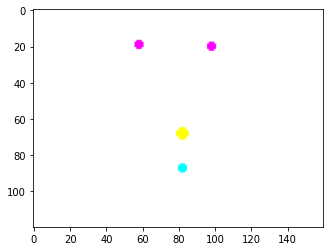

xmin =  206
ymin =  119
xmax =  439
ymax =  348
name =  ball  land_marks =  [115  95]
(120, 160, 3)


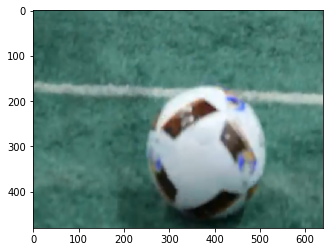

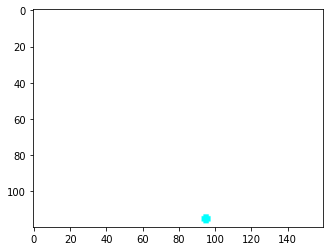

xmin =  446
ymin =  261
xmax =  510
ymax =  327
name =  ball  land_marks =  [108 141]
xmin =  229
ymin =  17
xmax =  321
ymax =  213
name =  robot  land_marks =  [70 81]
xmin =  327
ymin =  1
xmax =  354
ymax =  159
name =  goalpost  land_marks =  [ 52 100]
xmin =  6
ymin =  14
xmax =  43
ymax =  213
name =  goalpost  land_marks =  [70  6]
(120, 160, 3)


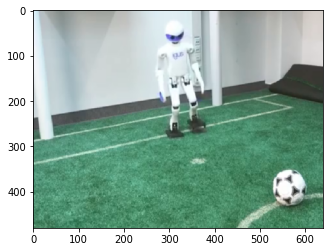

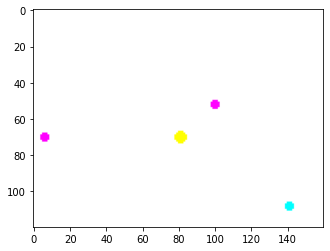

xmin =  107
ymin =  129
xmax =  164
ymax =  183
name =  ball  land_marks =  [36 26]
xmin =  153
ymin =  1
xmax =  186
ymax =  16
name =  goalpost  land_marks =  [ 3 33]
(120, 160, 3)


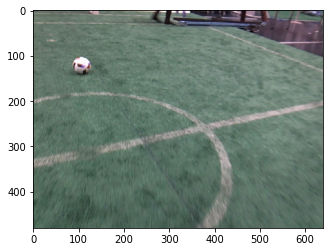

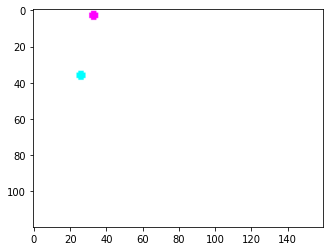

xmin =  170
ymin =  191
xmax =  241
ymax =  264
name =  ball  land_marks =  [52 41]
xmin =  208
ymin =  19
xmax =  323
ymax =  253
name =  robot  land_marks =  [50 52]
xmin =  707
ymin =  16
xmax =  780
ymax =  63
name =  robot  land_marks =  [ 12 148]
xmin =  100
ymin =  1
xmax =  148
ymax =  244
name =  goalpost  land_marks =  [48 24]
xmin =  1
ymin =  9
xmax =  27
ymax =  127
name =  robot  land_marks =  [25  2]
(120, 160, 3)


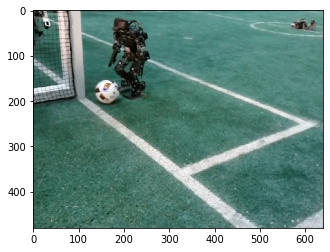

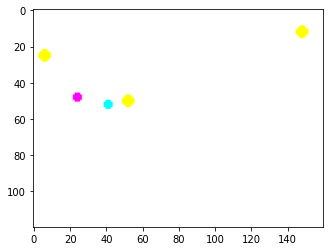

done  0


In [154]:
show("/home/user/bhassan/baraa/dataset/data/blob/dataset")